# import libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from matplotlib import style
import datetime
import haversine as hs

# read and format dataset function

In [2]:
def read_dataset(file_name):
    df= pd.read_table(file_name,sep=",",header=0)
    df.columns = ['CIN','latitude','longitude','SPEED','ENGINE_RPM','ENGINE_LOAD','AmbientAirTemp','ThrottlePos','insFuel','valX','valY','valZ','zone','place','time']
    df['time'] = np.array(df['time'], dtype=np.datetime64)
    df['date'] = [d.date() for d in df['time']]
    df['hour'] = [d.time() for d in df['time']]
    return df

In [3]:
df = read_dataset("data1.csv")
df.head()

,CIN,latitude,longitude,SPEED,ENGINE_RPM,ENGINE_LOAD,AmbientAirTemp,ThrottlePos,insFuel,valX,valY,valZ,zone,place,time,date,hour
0,6023226,35.081887,9.869902,20.0,2810,"40,4%",36C,"23,9%",NaN,NaN,NaN,NaN,Nationale,GP13,2020-07-05 21:13:12,2020-07-05,21:13:12
1,6023226,35.081886,9.870205,26.0,2116,"83,5%",36C,"33,7%",NaN,NaN,NaN,NaN,Nationale,GP13,2020-07-05 21:13:16,2020-07-05,21:13:16
2,6023226,35.081931,9.870459,37.0,1828,"64,7%",36C,"25,9%",NaN,NaN,NaN,NaN,Nationale,GP13,2020-07-05 21:13:19,2020-07-05,21:13:19
3,6023226,35.081950,9.871037,41.0,2019,"64,7%",36C,"26,3%",NaN,NaN,NaN,NaN,Nationale,GP13,2020-07-05 21:13:22,2020-07-05,21:13:22
4,6023226,35.081988,9.871456,44.0,2173,"61,6%",36C,"27,5%",NaN,NaN,NaN,NaN,Nationale,GP13,2020-07-05 21:13:26,2020-07-05,21:13:26


# data cleaning

In [4]:
def data_prepare(df):
    df['AmbientAirTemp'] = df['AmbientAirTemp'].str.replace(r'\D+', '')
    df['AmbientAirTemp'] = pd.to_numeric(df['AmbientAirTemp'], errors='coerce').astype('float')
    df['ENGINE_RPM'] = pd.to_numeric(df['ENGINE_RPM'], errors='coerce').astype('float')    
    df['ENGINE_LOAD'] = df['ENGINE_LOAD'].str.replace(r'\D+', '')
    df['ENGINE_LOAD'] = pd.to_numeric(df['ENGINE_LOAD'], errors='coerce').astype('float')    
    df['ThrottlePos'] = df['ThrottlePos'].str.replace(r'\D+', '')
    df['ThrottlePos'] = pd.to_numeric(df['ThrottlePos'], errors='coerce').astype('float')
    #df.drop(['CIN', 'time','insFuel','valX','valY','valZ'], axis=1, inplace=True)
    df.info()
    return df

In [5]:
data = data_prepare(df)
data.head()

C:\Users\DELL\AppData\Local\Temp/ipykernel_1376/1770799841.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['AmbientAirTemp'] = df['AmbientAirTemp'].str.replace(r'\D+', '')
C:\Users\DELL\AppData\Local\Temp/ipykernel_1376/1770799841.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ENGINE_LOAD'] = df['ENGINE_LOAD'].str.replace(r'\D+', '')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108516 entries, 0 to 108515
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CIN             108516 non-null  int64         
 1   latitude        108516 non-null  float64       
 2   longitude       108516 non-null  float64       
 3   SPEED           96060 non-null   float64       
 4   ENGINE_RPM      96040 non-null   float64       
 5   ENGINE_LOAD     95747 non-null   float64       
 6   AmbientAirTemp  95972 non-null   float64       
 7   ThrottlePos     95737 non-null   float64       
 8   insFuel         63547 non-null   float64       
 9   valX            105018 non-null  float64       
 10  valY            105018 non-null  float64       
 11  valZ            105018 non-null  float64       
 12  zone            108516 non-null  object        
 13  place           6903 non-null    object        
 14  time            108516 non-null  dat

C:\Users\DELL\AppData\Local\Temp/ipykernel_1376/1770799841.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ThrottlePos'] = df['ThrottlePos'].str.replace(r'\D+', '')


,CIN,latitude,longitude,SPEED,ENGINE_RPM,ENGINE_LOAD,AmbientAirTemp,ThrottlePos,insFuel,valX,valY,valZ,zone,place,time,date,hour
0,6023226,35.081887,9.869902,20.0,2810.0,404.0,36.0,239.0,NaN,NaN,NaN,NaN,Nationale,GP13,2020-07-05 21:13:12,2020-07-05,21:13:12
1,6023226,35.081886,9.870205,26.0,2116.0,835.0,36.0,337.0,NaN,NaN,NaN,NaN,Nationale,GP13,2020-07-05 21:13:16,2020-07-05,21:13:16
2,6023226,35.081931,9.870459,37.0,1828.0,647.0,36.0,259.0,NaN,NaN,NaN,NaN,Nationale,GP13,2020-07-05 21:13:19,2020-07-05,21:13:19
3,6023226,35.081950,9.871037,41.0,2019.0,647.0,36.0,263.0,NaN,NaN,NaN,NaN,Nationale,GP13,2020-07-05 21:13:22,2020-07-05,21:13:22
4,6023226,35.081988,9.871456,44.0,2173.0,616.0,36.0,275.0,NaN,NaN,NaN,NaN,Nationale,GP13,2020-07-05 21:13:26,2020-07-05,21:13:26


# missing_values plot

In [6]:
def missing_values(df):
    missing = df.isna().mean()
    style.use("fivethirtyeight")
    plt.figure(figsize=(12,7))
    return missing.plot(kind='bar', color='red');

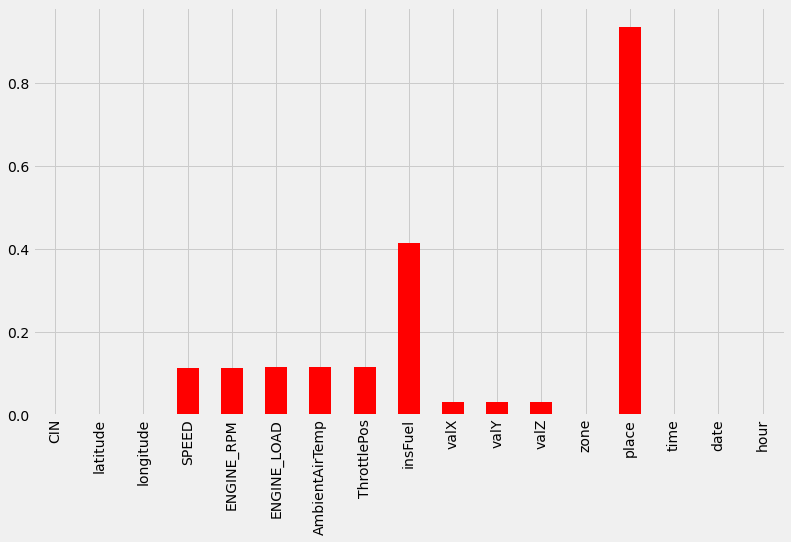

In [7]:
missing_plot = missing_values(data)

# visualization of numerical features distributions


In [13]:
def numerical_categorical(df):
    numerical = []
    categorical = []
    for k in df.columns:
        if df[k].dtypes != 'object':
            numerical.append(k)
        else:
            categorical.append(k)
    return numerical, categorical

In [15]:
def numerical_visualization(df):
    numerical, categorical = numerical_categorical(df)
    n_rows, n_cols = (7,2)
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 70))
    figure.suptitle('\nDistributions of Numerical Variables', fontsize=80)
    for i in range(len(numerical)):
        col=numerical[i]
        label1='Mean = {}\nMedian = {}\nStandard Deviation = {}'.format("%.2f"%df[col].mean(),df[col].median(),"%.2f"%df[col].std())
        graph1=sns.distplot(df[col],color="navy",ax=axes[i,0],kde_kws={"lw":4},label=label1)
        graph1=graph1.legend(loc='best',fontsize=20)
        axes[i,0].set_title(col+'\n(Probability Density)',fontsize=26)
        axes[i,0].set_xlabel(None)
        axes[i,0].set_ylabel("Pobability Density",fontsize=15)
        graph2=sns.boxplot(x=col,data=df,ax=axes[i,1],color='lavender',fliersize=8)
        axes[i,1].set_xlabel(None)
        axes[i,1].set_title(col+'\n(Quartiles)',fontsize=26)
    return graph1, graph2

NameError: name 'num' is not defined

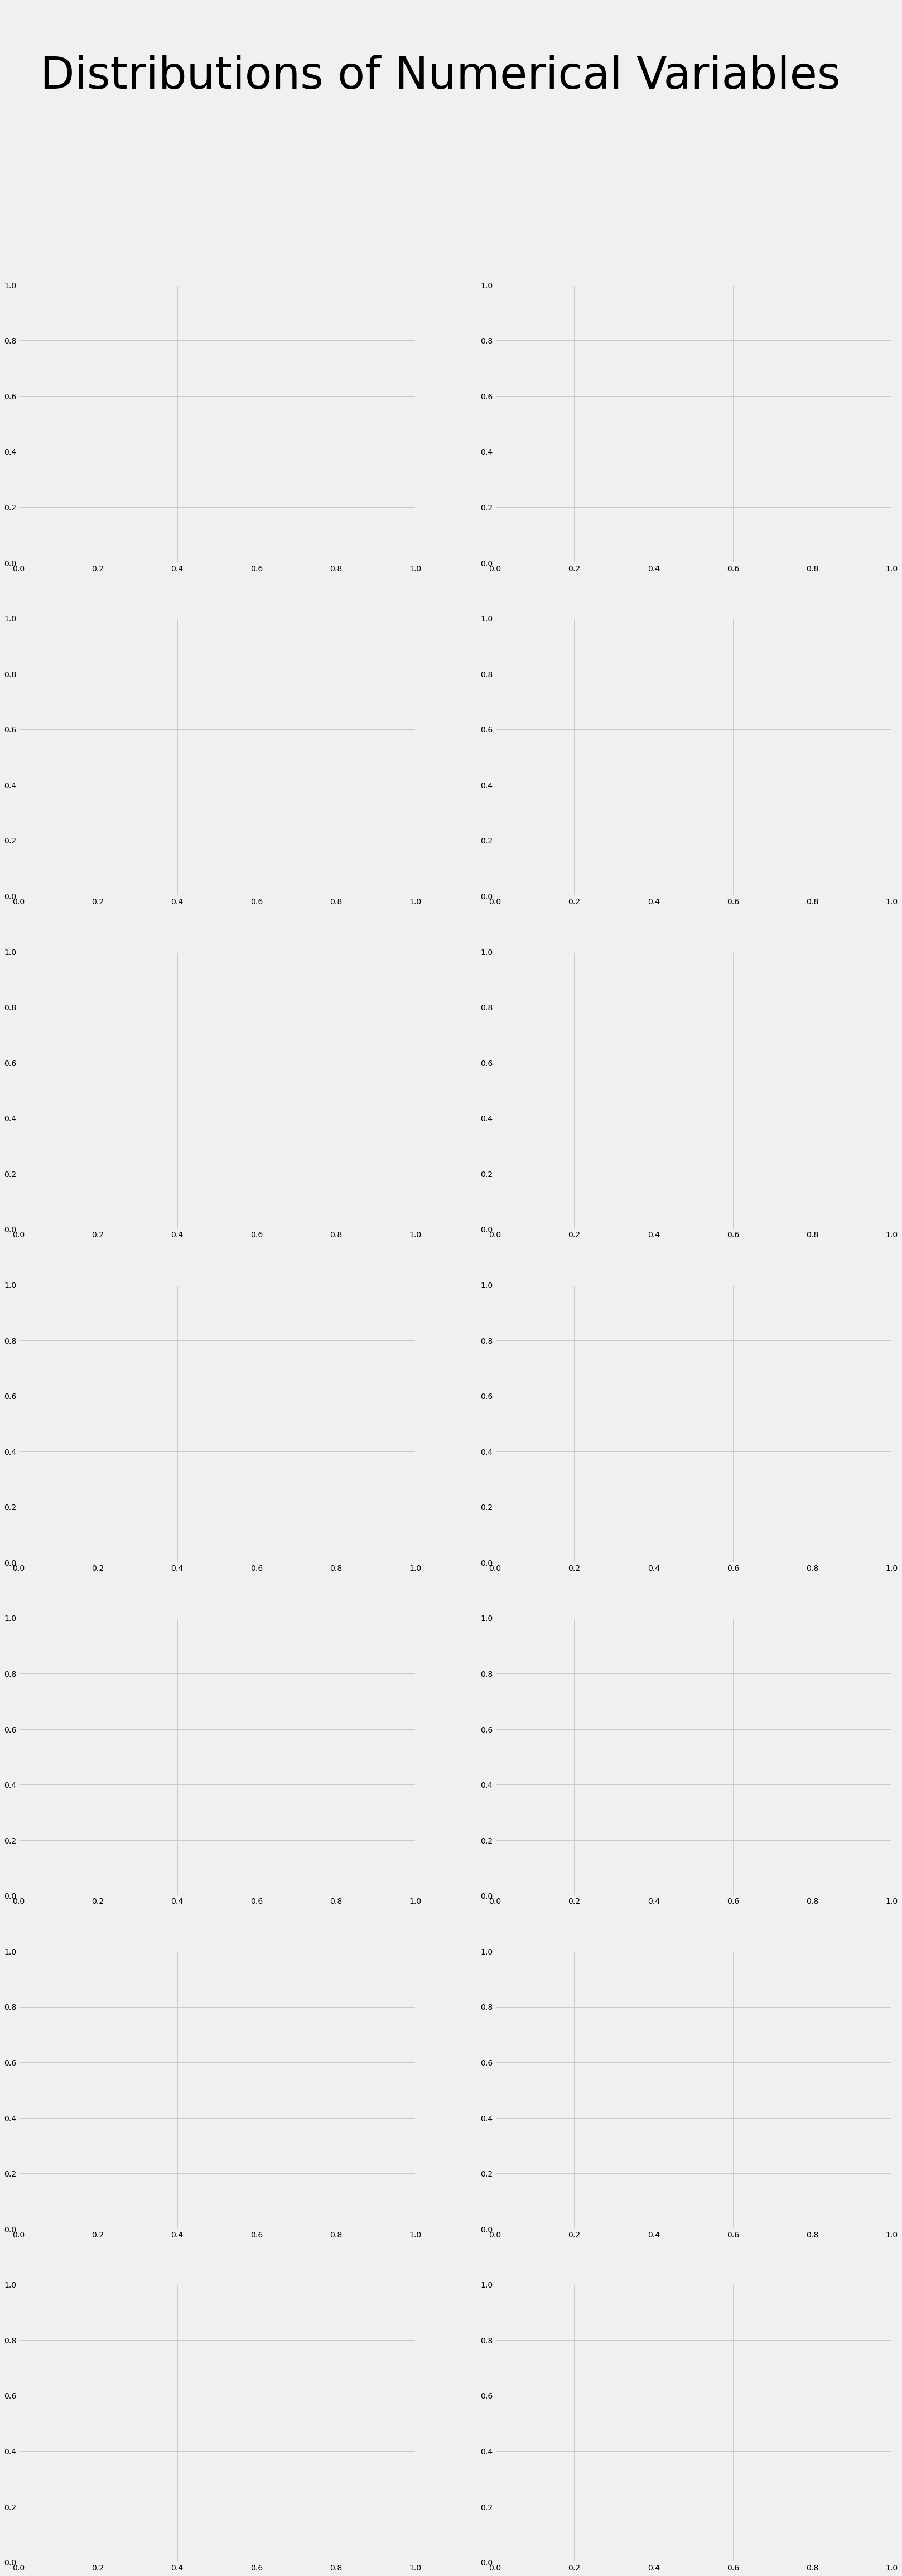

In [10]:
numerical_features_distributions = numerical_visualization(data)

# speed feature quartiles


In [22]:
def speed_quartiles(df):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,7))
    sns.histplot(data=df, x='SPEED', kde=True, color="crimson", ax=axes[0])
    boxplot = sns.boxenplot(data=df, x='SPEED', color="crimson", ax=axes[1])
    axes[0].set_title("SPEED Histogram", fontsize=9)
        axes[1].set_title("SPEED Boxenplot", fontsize=9)

    return boxplot

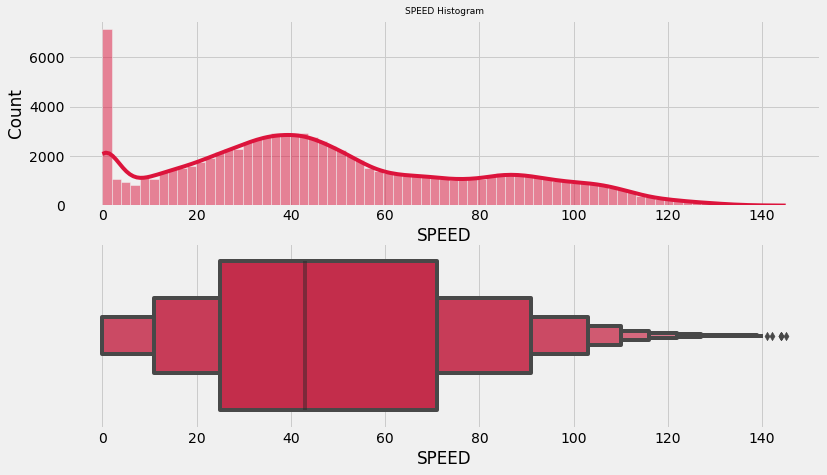

In [23]:
speed_feature = speed_quartiles(data)

# pearson correlation


In [24]:
def correlation(df):
    plt.figure(figsize=(18,8))
    numerical, categorical = numerical_categorical(df)
    return sns.heatmap(df.loc[:,numerical].corr(), annot=True, cmap="Blues");

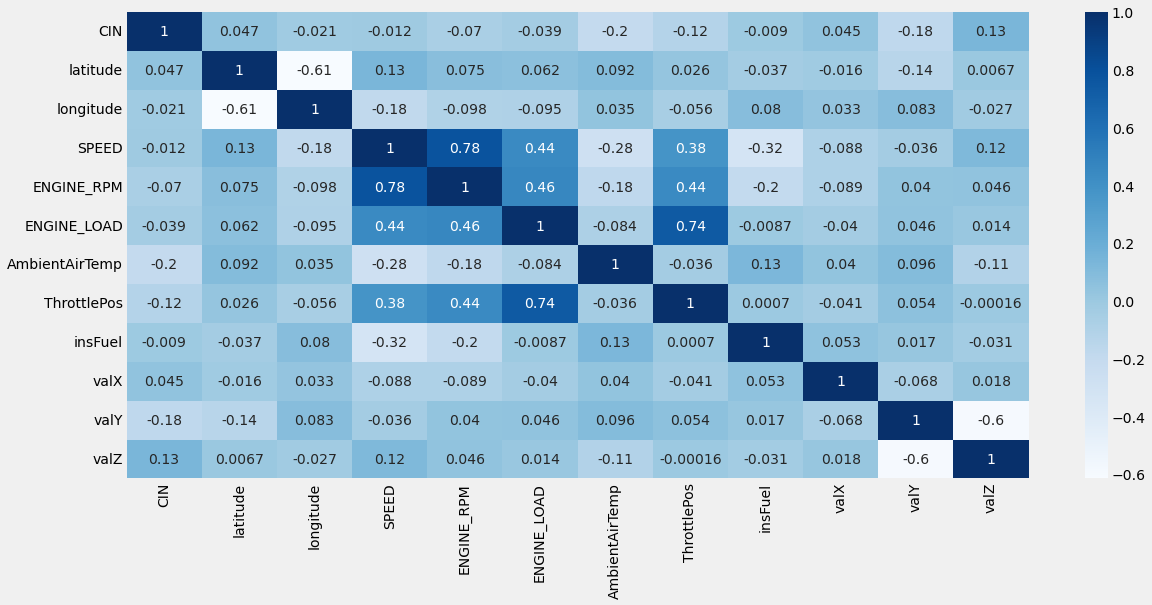

In [25]:
correlation = correlation(data)

## value counts of zone feature

In [26]:
def countplot(df):
    plt.figure(figsize=(10,6))
    return sns.countplot(x=df["zone"],palette="seismic")

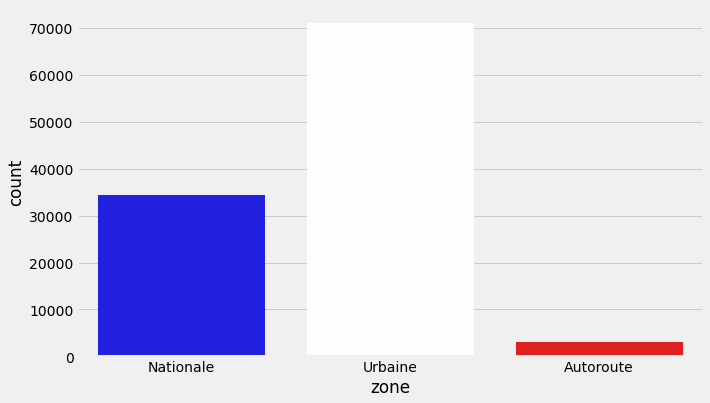

In [27]:
plot = countplot(data)

## relationship between speed and other numercial features with scatterplot

In [28]:
def scatter(df):
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
    x1 = sns.scatterplot(data=df, x='SPEED', y='ENGINE_RPM', color="crimson", ax=axes[0])
    axes[0].set_xlabel(axes[0].get_xlabel(), fontsize=18)
    axes[0].set_ylabel(axes[0].get_ylabel(), fontsize=18)
    x2 = sns.scatterplot(data=df, x='SPEED', y='ENGINE_LOAD', color='crimson', ax=axes[1])
    axes[1].set_xlabel(axes[1].get_xlabel(), fontsize=18)
    axes[1].set_ylabel(axes[1].get_ylabel(), fontsize=18)
    plt.show()
    return x1, x2

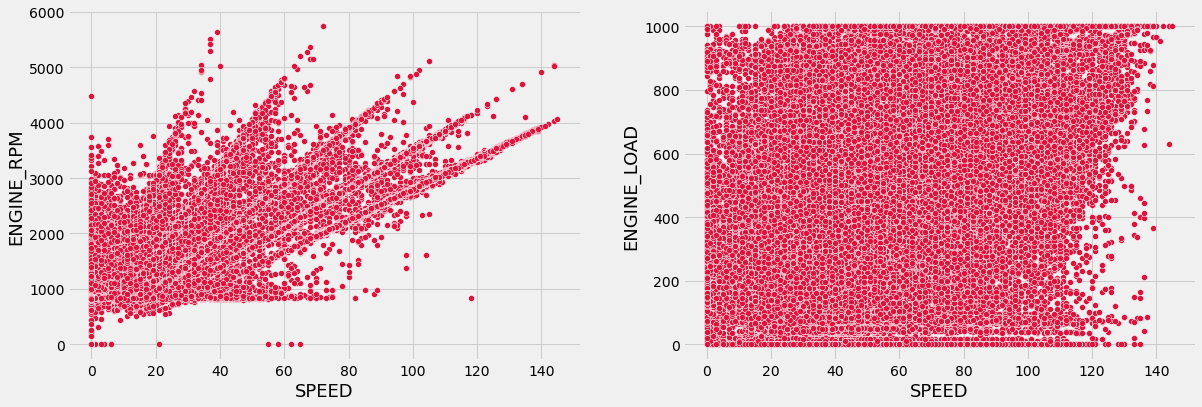

In [29]:
scatter = scatter(df)